# CHAPTER 6 학습 관련 기술들

## 6-1 매개변수 갱신

### 6-1-1 모험가 이야기

### 6-1-2 확률적 경사 하강법(SGD)

In [ ]:
class SGD:
    def __init__(self , lr = 0.01):
        self.lr = lr

    def update(self, params , grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6-1-3 SGD의 단점

### 6-1-4 모멘텀

In [ ]:
import numpy as np

class Momentum:
    def __init__(self , lr = 0.01 , momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self , params , grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.key():
            self.v[key] = self.momentum*self.v[key] - self.lr *grads[key]
            params[key] += self.v[key]

### 6-1-5 AdaGrad

In [ ]:
class AdaGrad:
    def __init__(self , lr = 0.01):
        self.lr = lr
        self.h = None
    
    def update(self , params , grads):
        if self.h is None:
            self.h = {}
        
        for key , val in params.items():
            self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6-1-6 Adam

### 6-1-7 어느 갱신 방법을 이용할 것인가?

### 6-1-8 MNIST 데이터셋으로 본 갱신 방법 비교

## 6-2 가중치의 초깃값

### 6-2-1 초깃값을 0으로 하면?

### 6-2-2 은닉층의 활성화값 분포

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000 , 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
    
    w = np.random.randn(node_num , node_num) * 1
    a = np.dot(x , w)
    z = sigmoid(a)
    activations[i] = z

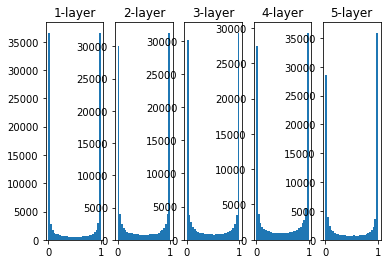

In [ ]:
#히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1 , len(activations) , i + 1)
    plt.title(str(i + 1)  + "-layer")
    plt.hist(a.flatten() , 30 , range = (0,1))

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000 , 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
    
    w = np.random.randn(node_num , node_num) * 0.01
    a = np.dot(x , w)
    z = sigmoid(a)
    activations[i] = z

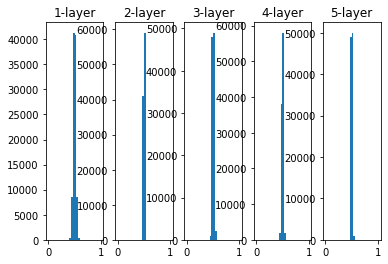

In [ ]:
#히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1 , len(activations) , i + 1)
    plt.title(str(i + 1)  + "-layer")
    plt.hist(a.flatten() , 30 , range = (0,1))

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000 , 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
    
    w = np.random.randn(node_num , node_num) / np.sqrt(node_num)
    a = np.dot(x , w)
    z = sigmoid(a)
    activations[i] = z

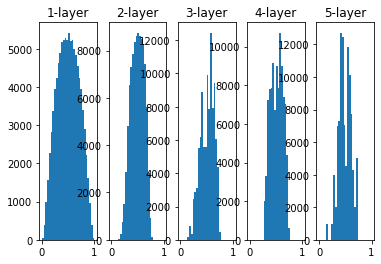

In [ ]:
#히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1 , len(activations) , i + 1)
    plt.title(str(i + 1)  + "-layer")
    plt.hist(a.flatten() , 30 , range = (0,1))

plt.show()

### 6-2-3 ReLU를 사용할 때의 가중치 초깃값

### 6-2-4 MNIST 데이터셋으로 본 가중치 초깃값 비교

## 6-3 배치 정규화

### 6-3-1 배치 정규화 알고리즘

### 6-3-2 배치 정규화의 효과

## 6-4 바른 학습을 위해

### 6-4-1 오버피팅

In [7]:
import sys, os
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥/dataset')
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥/common')
sys.path.append('/content/drive/MyDrive/AI/독학/밑시딥/')
import numpy as np
from mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from optimizer import SGD
from util import shuffle_dataset


(x_train , t_train), (x_test , t_test) = load_mnist(normalize = True)
#오버피팅을 재현하기 ㅜ이해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [8]:
network = MultiLayerNet(input_size = 784 , hidden_size_list = [100 ,100 ,100, 100, 100 ,100] , output_size = 10)
optimizer = SGD(lr = 0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size , 1)
epoch_cnt = 0

for i in range(10**8):
    batch_mask = np.random.choice(train_size , batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch , t_batch)
    optimizer.update(network.params , grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train , t_train)
        test_acc = network.accuracy(x_test , t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

### 6-4-2 가중치 감소

### 6-4-3 드롭아웃

In [9]:
class Dropout:
    def __init__(self , dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self , x , train_flg = True):
        if train_flg:
            self.mask = np.random.rand(x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self , dout):
        return dout * self.mask

## 6-5 적절한 하이퍼파라미터 값 찾기

### 6-5-1 검증 데이터

In [10]:
(x_train , t_train) , (x_test , t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train , t_train = shuffle_dataset(x_train , t_train)

# 20%를 검증데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6-5-2 하이퍼파라미터 최적화

### 6-5-3 하이퍼파라미터 최적화 구현하기

## 6-6 정리